**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Karen Lizette Rodríguez Hernández
*   MATRÍCULA: A01197734

*   NOMBRE: Marcelo Ismael López Verdugo
*   MATRÍCULA: A00959089

*   NOMBRE: Angel García Ortega
*   MATRÍCULA: A01796653

*   NOMBRE: Juan Carlos Garcés Carrillo
*   MATRÍCULA: A01796283

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/MNA/1-Trimestre/CienciaDatos/Equipo 29"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [6]:
# Eliminar columnas
cars_df.drop(['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], axis=1, inplace=True)
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [7]:
# Definir tamaños de registros y columnas
num_rows = cars_df.shape[0]
num_cols = cars_df.shape[1]
print(f"Número de registros: {num_rows}")
print(f"Número de columnas: {num_cols}")

Número de registros: 426880
Número de columnas: 18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [8]:
# Porcentaje de valores faltantes por columna
missing_percentage = cars_df.isna().mean() * 100
missing_percentage

,0
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


Utilizando la función de `isna()` se puede observar que hay 6 columnas que poseen más de 30% de valores faltantes.
- `condition`: 40.78%
- `cylinders`: 41.62%
- `drive`: 30.58%
- `size`: 71.76%
- `paint_color`: 30.50%
- `county`: 100%

In [9]:
# Eliminar columnas con más de 30% de valores faltantes
cars_df.dropna(thresh=0.7*num_rows, axis=1, inplace=True)
cars_df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [10]:
# Borra los registros que contengan NaN en las columnas con menos del 5% de valores faltantes
columns_less_than_5 = missing_percentage[missing_percentage < 5].index.tolist()
print(f"Columnas con menos del 5% de valores faltantes: {columns_less_than_5}")
cars_df.dropna(subset=columns_less_than_5, inplace=True)
cars_df

Columnas con menos del 5% de valores faltantes: ['region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'state']


,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
27,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al
28,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al
29,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al
30,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al
31,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy


In [11]:
# Porcentaje de registros eliminados
print(f"Porcentaje de registros eliminados: {(num_rows - cars_df.shape[0])/num_rows*100}%")

Porcentaje de registros eliminados: 8.7321964017991%


Se han eliminado el **8.73%** de registros tomando en cuenta los registros iniciales (después de eliminar las columnas que no son relevantes para esta actividad)

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [12]:
# Conocer variables con valores faltantes
cars_df.isna().sum()

,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


In [13]:
# Imputar valores en type utilizando la moda
cars_df['type'] = cars_df['type'].fillna(cars_df['type'].mode()[0])
cars_df['type'].isna().sum()

0

La única variable con valores faltantes era `type` ya que tenía un 21.75%. El método que se utilizó para imputar valores fue la **moda**, ya que es una variable categórica de tipo nominal.

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

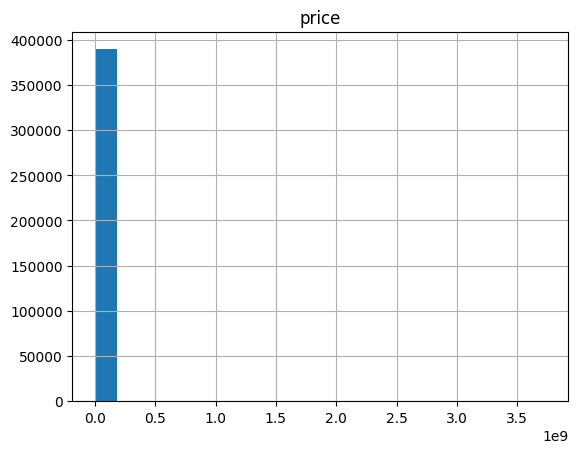

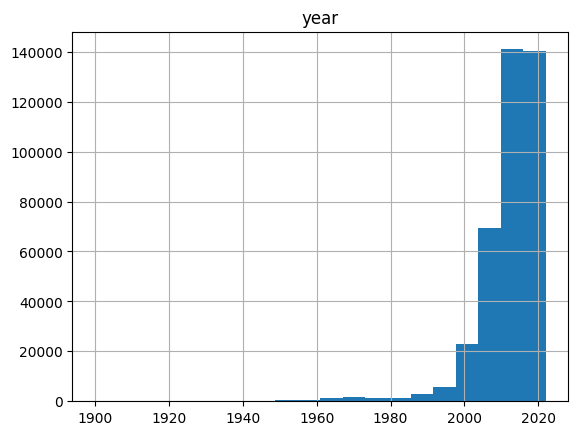

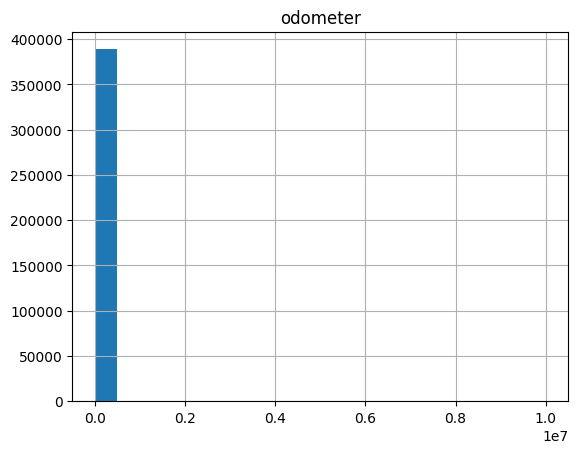

In [14]:
# Histogramas de price, year y odometer
cars_df['price'].hist(bins=20)
plt.title('price')
plt.show()
cars_df['year'].hist(bins=20)
plt.title('year')
plt.show()
cars_df['odometer'].hist(bins=20)
plt.title('odometer')
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [15]:
# Generar columna age
cars_df['age'] = 2024 - cars_df['year']
cars_df.drop('year', axis=1, inplace=True)
cars_df

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
27,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,10.0
28,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,14.0
29,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,4.0
30,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,7.0
31,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,5.0
426876,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,4.0
426877,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,4.0
426878,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,6.0


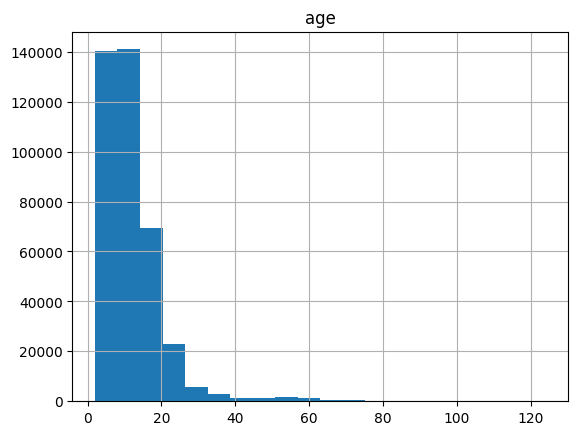

In [16]:
# Histograma de age
cars_df['age'].hist(bins=20)
plt.title('age')
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

Valores atípicos de 'price': 6656
Valores atípicos de 'age': 14209
Valores atípicos de 'odometer': 3226


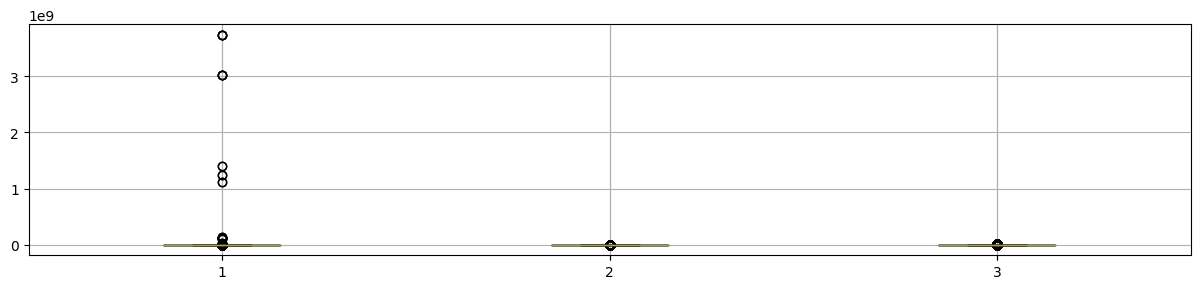

In [17]:
# Boxplots para prive, age y odometer
fig = cars_df.boxplot(column=['price', 'age', 'odometer'], figsize=(15, 3))
fig = plt.boxplot([cars_df['price'], cars_df['age'], cars_df['odometer']])
print(f"Valores atípicos de 'price': {fig['fliers'][0].get_data()[0].size}")
print(f"Valores atípicos de 'age': {fig['fliers'][1].get_data()[0].size}")
print(f"Valores atípicos de 'odometer': {fig['fliers'][2].get_data()[0].size}")
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [18]:
# Porcentaje de valores atípicos de price
q1 = cars_df['price'].quantile(0.25)
q3 = cars_df['price'].quantile(0.75)
iqr = q3 - q1
BM_price = (cars_df['price'] < (q1 - 1.5 * iqr)) | (cars_df['price'] > (q3 + 1.5 * iqr))
outliers_price_count = BM_price.sum()
outliers_price_porcentage = outliers_price_count/cars_df.shape[0]*100
print(f"Número de valores atípicos de price: {outliers_price_count}")
print(f"Porcentaje de valores atípicos de price: {outliers_price_porcentage}%")

Número de valores atípicos de price: 6656
Porcentaje de valores atípicos de price: 1.7084013511154916%


In [19]:
# Porcentaje de valores atípicos de age
q1 = cars_df['age'].quantile(0.25)
q3 = cars_df['age'].quantile(0.75)
iqr = q3 - q1
BM_age = (cars_df['age'] < (q1 - 1.5 * iqr)) | (cars_df['age'] > (q3 + 1.5 * iqr))
outliers_age_count = BM_age.sum()
outliers_age_porcentage = outliers_age_count/cars_df.shape[0]*100
print(f"Número de valores atípicos de price: {outliers_age_count}")
print(f"Porcentaje de valores atípicos de price: {outliers_age_porcentage}%")

Número de valores atípicos de price: 14209
Porcentaje de valores atípicos de price: 3.647036478064907%


In [20]:
# Porcentaje de valores atípicos de odometer
q1 = cars_df['odometer'].quantile(0.25)
q3 = cars_df['odometer'].quantile(0.75)
iqr = q3 - q1
BM_odometer = (cars_df['odometer'] < (q1 - 1.5 * iqr)) | (cars_df['odometer'] > (q3 + 1.5 * iqr))
outliers_odometer_count = BM_odometer.sum()
outliers_odometer_porcentage = outliers_odometer_count/cars_df.shape[0]*100
print(f"Número de valores atípicos de price: {outliers_odometer_count}")
print(f"Porcentaje de valores atípicos de price: {outliers_odometer_porcentage}%")

Número de valores atípicos de price: 3226
Porcentaje de valores atípicos de price: 0.8280202461987043%


In [21]:
# Eliminar valores atípicos
cars_df = cars_df[~BM_price & ~BM_age & ~BM_odometer]
cars_df

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
27,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,10.0
28,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,14.0
29,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,4.0
30,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,7.0
31,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,5.0
426876,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,4.0
426877,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,4.0
426878,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,6.0


In [22]:
# Porcentaje de registros eliminados
print(f"Porcentaje de registros eliminados: {(num_rows - cars_df.shape[0])/num_rows*100}%")

Porcentaje de registros eliminados: 14.184782608695654%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

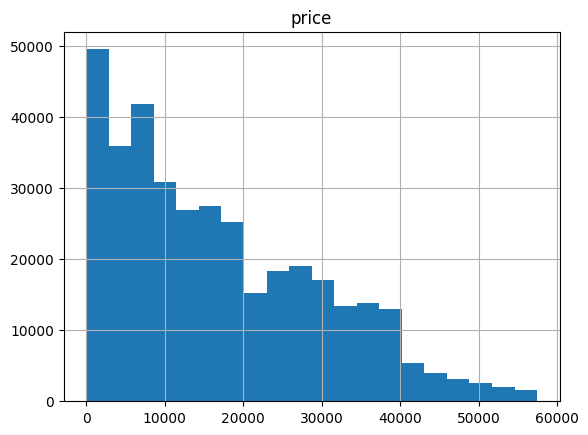

Asimetría de 'price': 0.6785214241273719


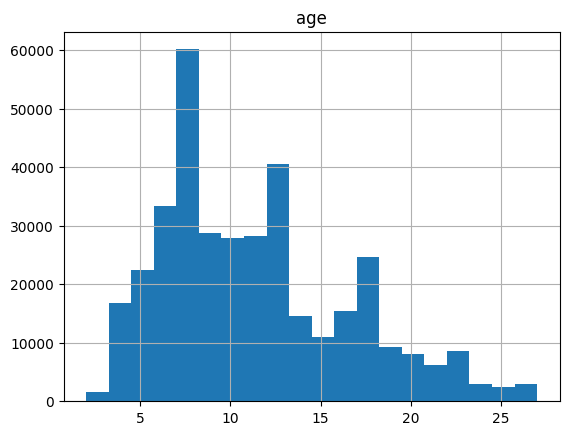

Asimetría de 'age': 0.7478959885588191


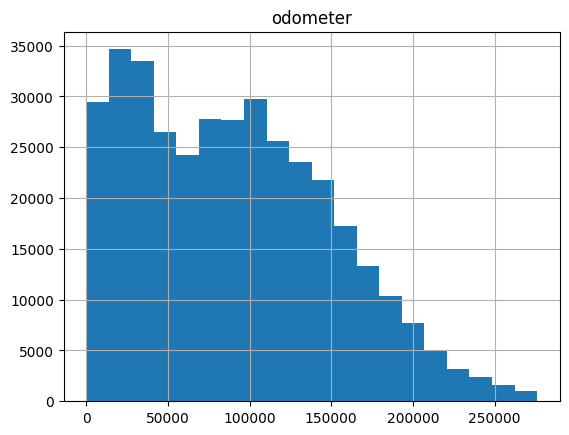

Asimetría de 'odometer': 0.464834384853233


In [23]:
# Histogramas de price, age y odometer
cars_df['price'].hist(bins=20)
plt.title('price')
plt.show()
print(f"Asimetría de 'price': {stats.skew(cars_df['price'])}")
cars_df['age'].hist(bins=20)
plt.title('age')
plt.show()
print(f"Asimetría de 'age': {stats.skew(cars_df['age'])}")
cars_df['odometer'].hist(bins=20)
plt.title('odometer')
plt.show()
print(f"Asimetría de 'odometer': {stats.skew(cars_df['odometer'])}")

Al visualizar los histogramas sin los valores atípicos se puede observar que las **3 variables tienen un sesgo positivo**, ya que los valores con mayor frecuencia se encuentran a la izquierda, y los de menor frecuencia a la derecha. Estos resultados se pueden validar con el número de asimetría en donde las 3 variables tienen un número positivo.

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [24]:
# Función para generar histogramas y gráficas Q-Q
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

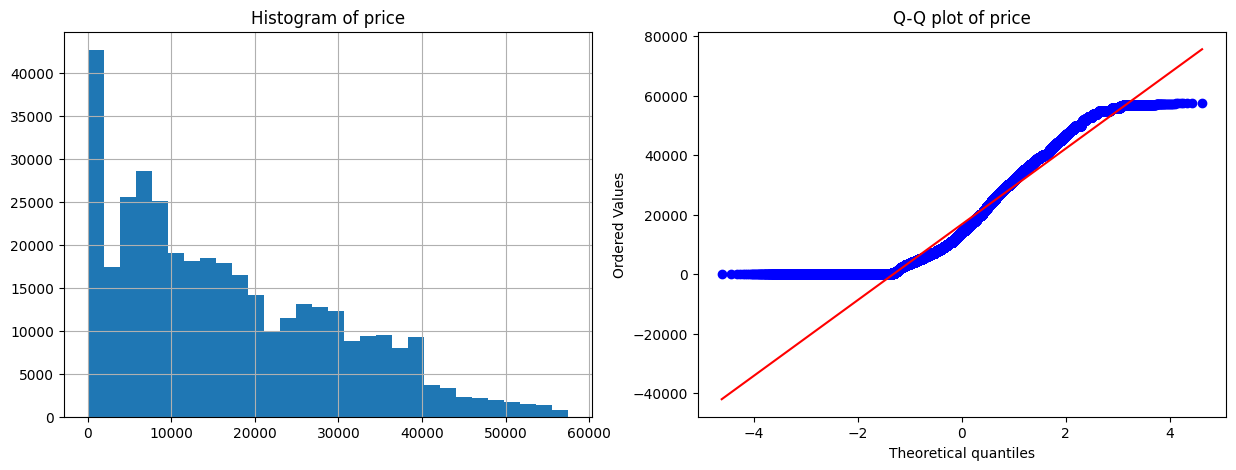

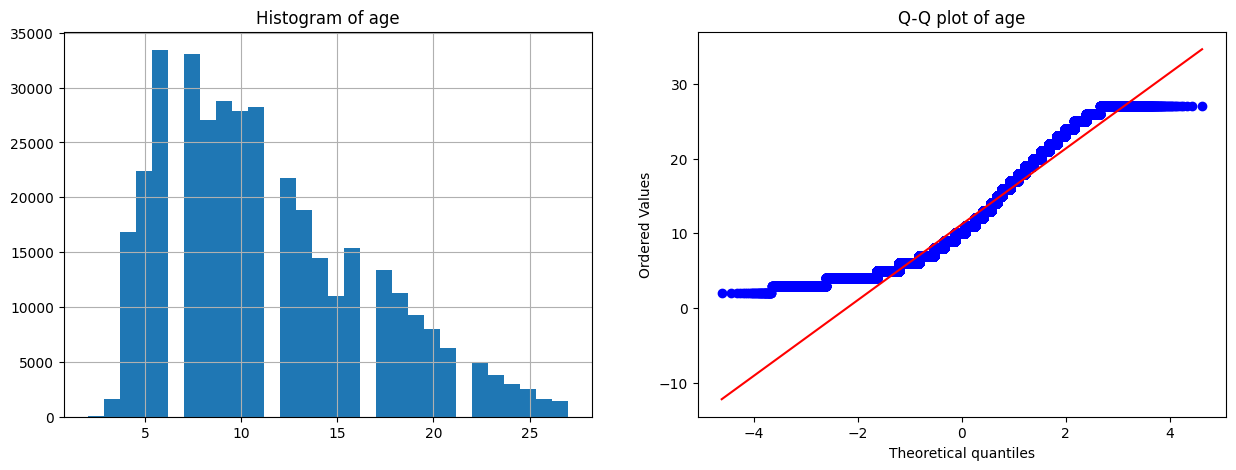

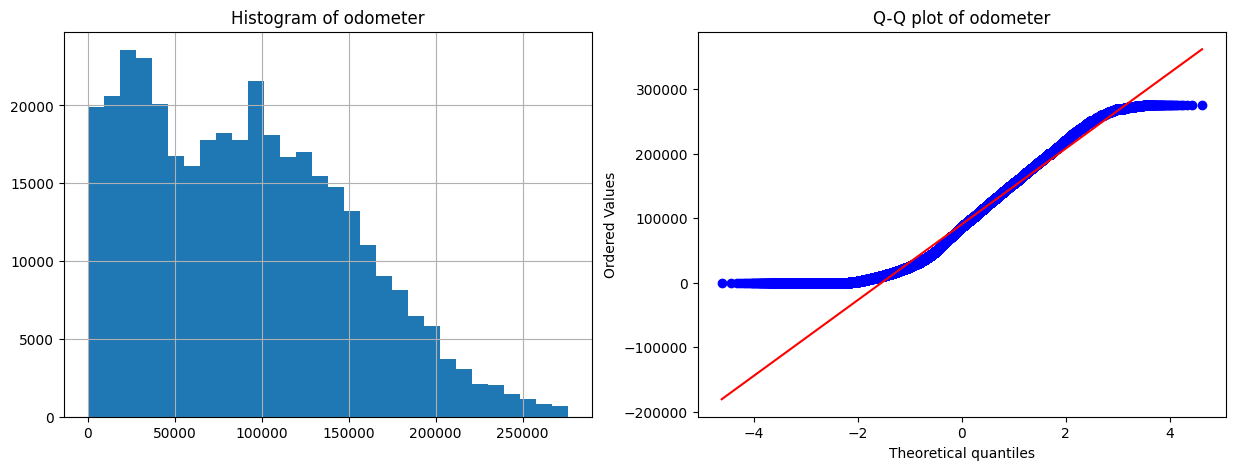

In [25]:
# Gráficos Q-Q de price, age y odometer
diagnostic_plots(cars_df, 'price')
diagnostic_plots(cars_df, 'age')
diagnostic_plots(cars_df, 'odometer')

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [26]:
# Transformación Yeo-Johnson
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transf_df = pd.DataFrame(transformer.fit_transform(cars_df[['price', 'age', 'odometer']]), columns=['price', 'age', 'odometer'])
transf_df

,price,age,odometer
0,194.933364,2.472590,623.675987
1,164.326657,2.803571,695.994731
2,209.204110,1.642861,346.526341
3,188.293578,2.135461,519.996769
4,137.708592,2.565181,949.705360
...,...,...,...
366323,167.423035,1.833249,456.840699
366324,187.243996,1.642861,270.474616
366325,198.386565,1.642861,153.705344
366326,182.964760,1.994910,440.666821


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

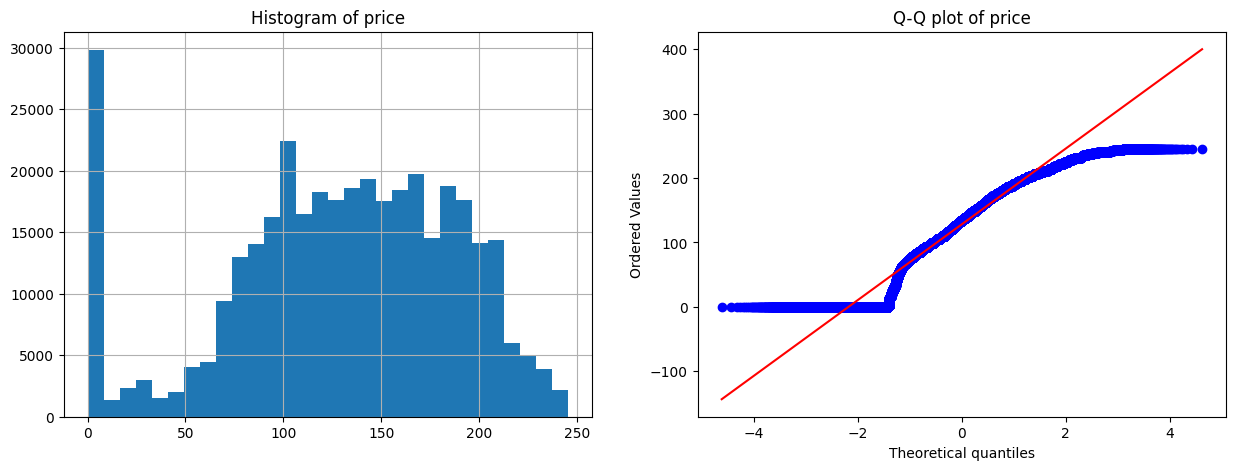

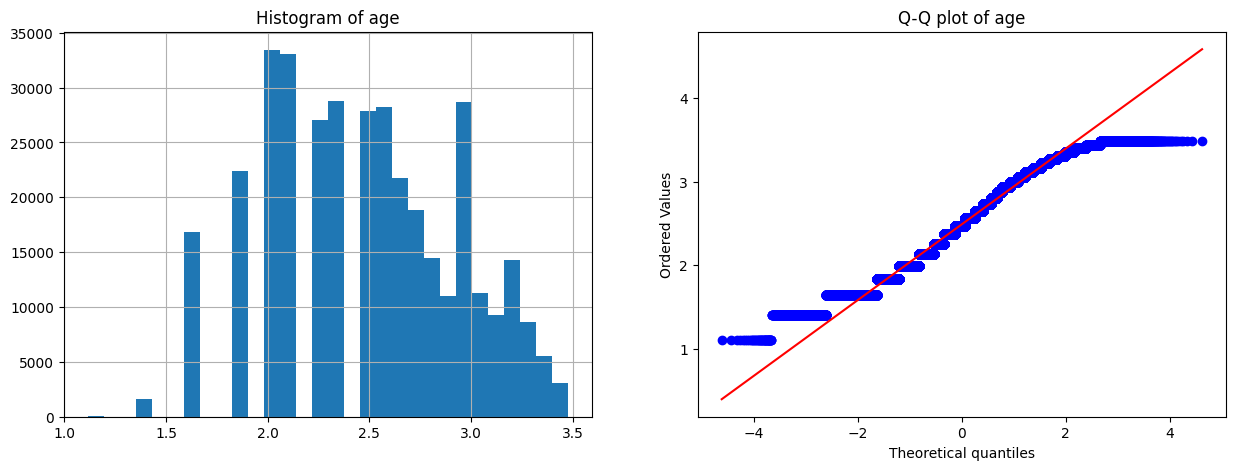

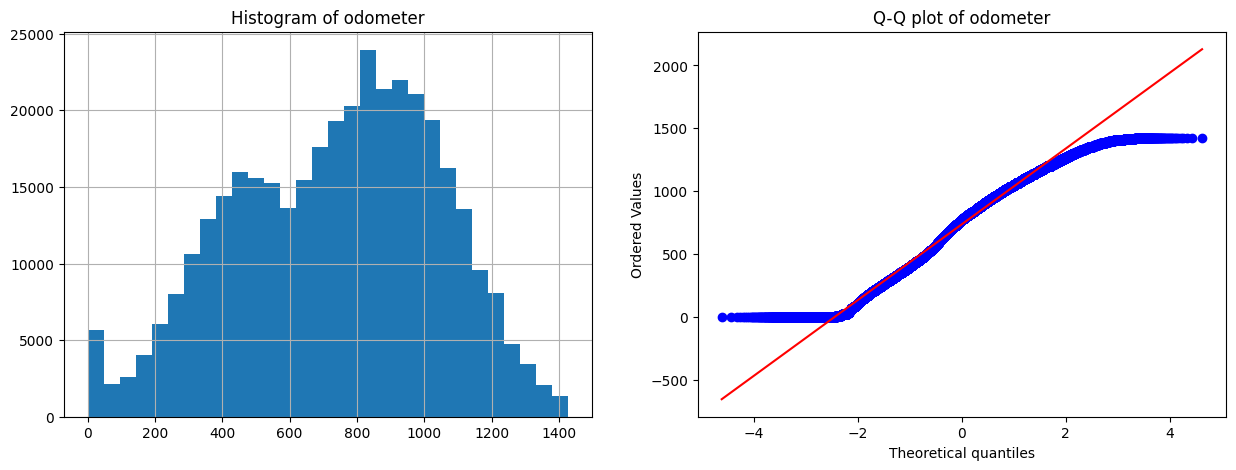

In [27]:
# Gráficas para las variables price, age y odometer
diagnostic_plots(transf_df, 'price')
diagnostic_plots(transf_df, 'age')
diagnostic_plots(transf_df, 'odometer')

Después de aplicar la transformación, se puede observar en los histogramas y en las gráficas Q-Q la gran diferencia que existe en la distribución de las variables, al cambiar a una distribución con forma Gaussiana.

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [28]:
# Aplicar método Min-Max
from sklearn.preprocessing import MinMaxScaler
minmax_df = pd.DataFrame(MinMaxScaler().fit_transform(transf_df), columns=['price', 'age', 'odometer'])
minmax_df

,price,age,odometer
0,0.794060,0.574773,0.437060
1,0.669384,0.714813,0.487739
2,0.852192,0.223713,0.242839
3,0.767013,0.432133,0.364403
4,0.560956,0.613949,0.665534
...,...,...,...
366323,0.681997,0.304266,0.320145
366324,0.762738,0.223713,0.189543
366325,0.808127,0.223713,0.107714
366326,0.745306,0.372666,0.308810


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

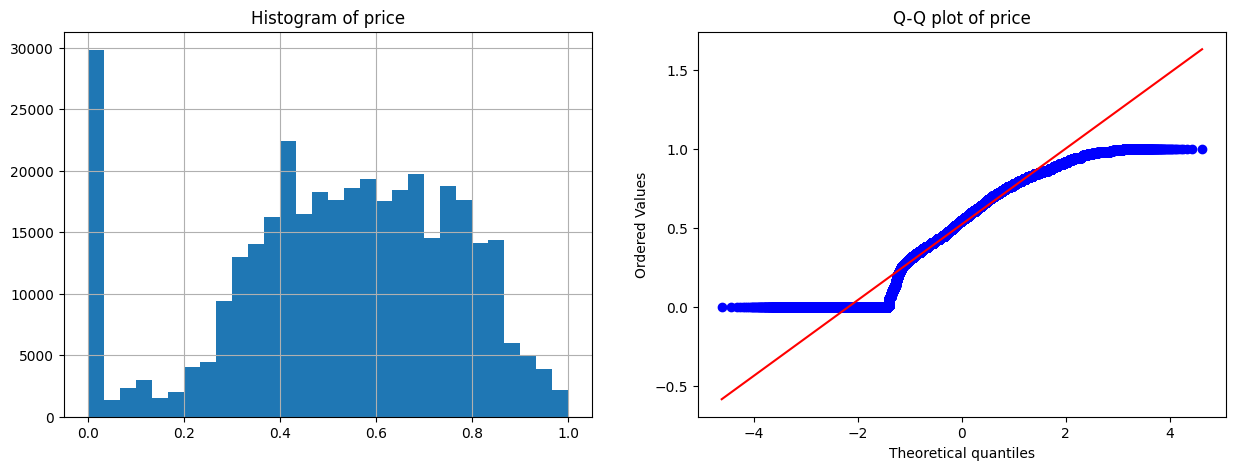

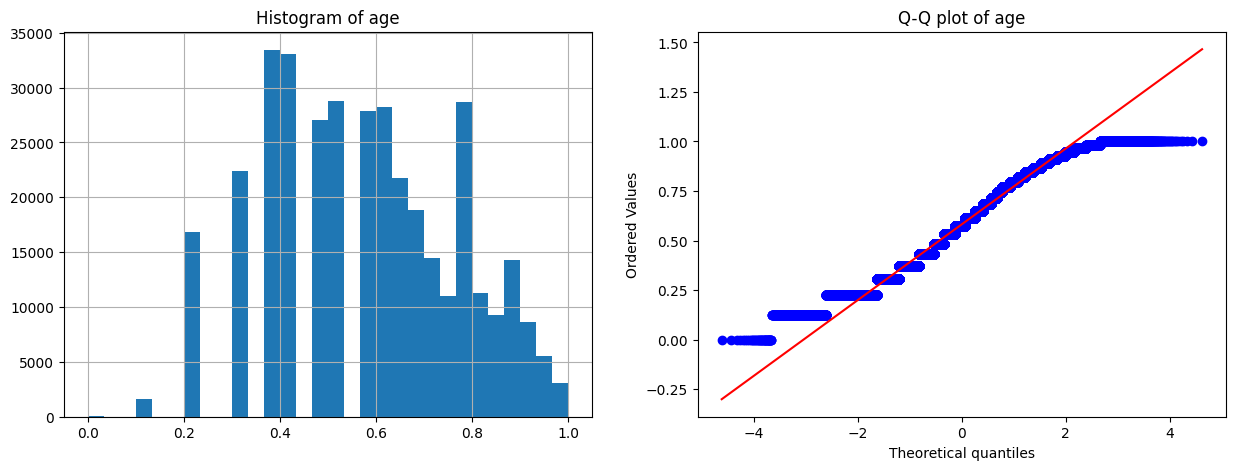

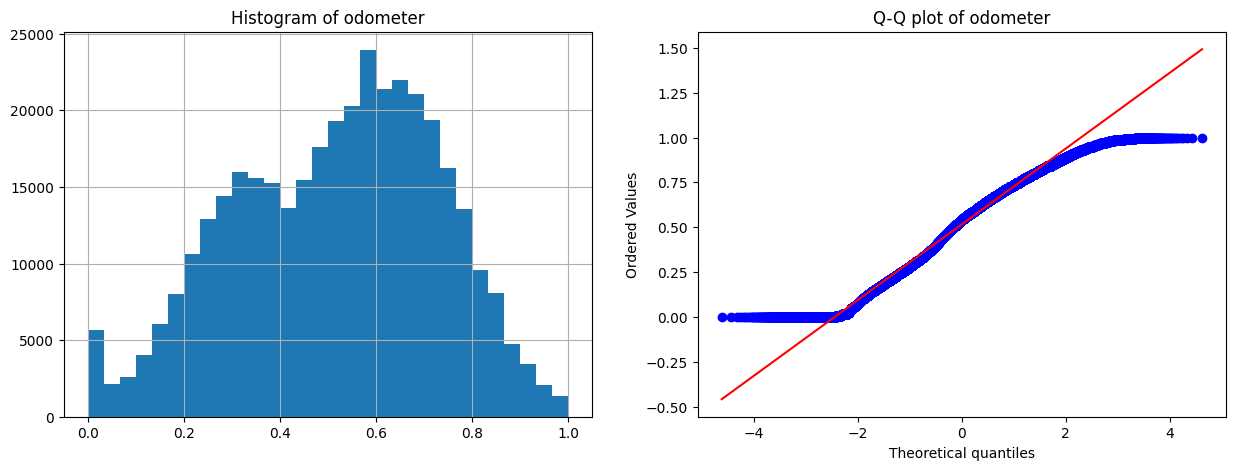

In [29]:
# Gráficas para las variables price, age y odometer
diagnostic_plots(minmax_df, 'price')
diagnostic_plots(minmax_df, 'age')
diagnostic_plots(minmax_df, 'odometer')

Al observar las gráficas, se confirma que después de la normalización, la distribución de los datos no cambio.

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [30]:
# Estadísticas descriptivas de las variables categóricas
cars_df.describe(include='object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,366328,366328,366328,366328,366328,366328,366328,366328,366328
unique,404,413,40,19097,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3188,2737,61660,7436,312085,354717,291628,154259,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [31]:
# Separar listas por cardinalidad de variables categóricas
highly_cardinal_variables = cars_df.select_dtypes(include=['object']).nunique()[cars_df.nunique() > 100].index.tolist()
few_cardinal_variables = cars_df.select_dtypes(include=['object']).nunique()[cars_df.nunique() <= 100].index.tolist()
print(f"Variables con alta cardinalidad: {highly_cardinal_variables}")
print(f"Variables con baja cardinalidad: {few_cardinal_variables}")

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

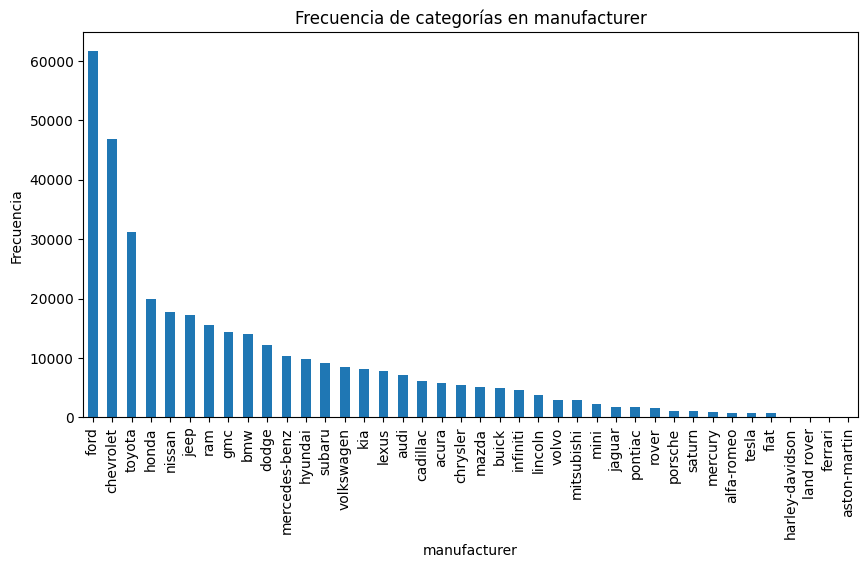

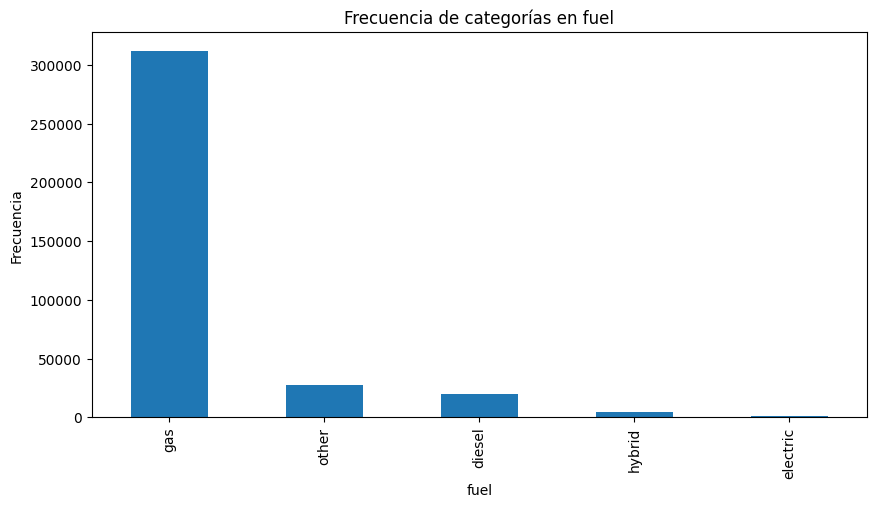

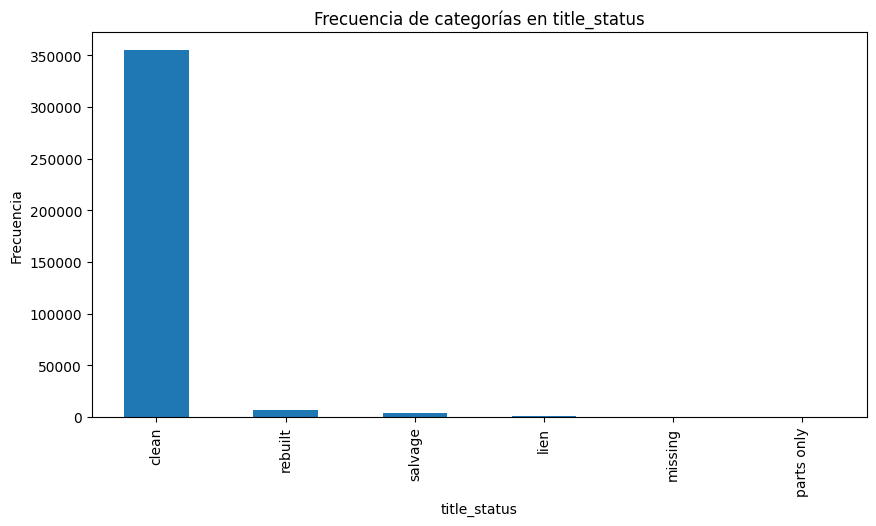

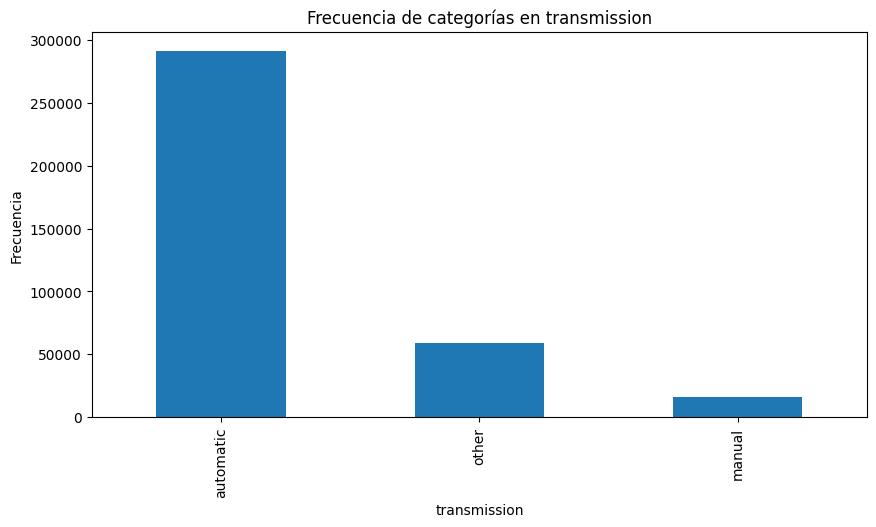

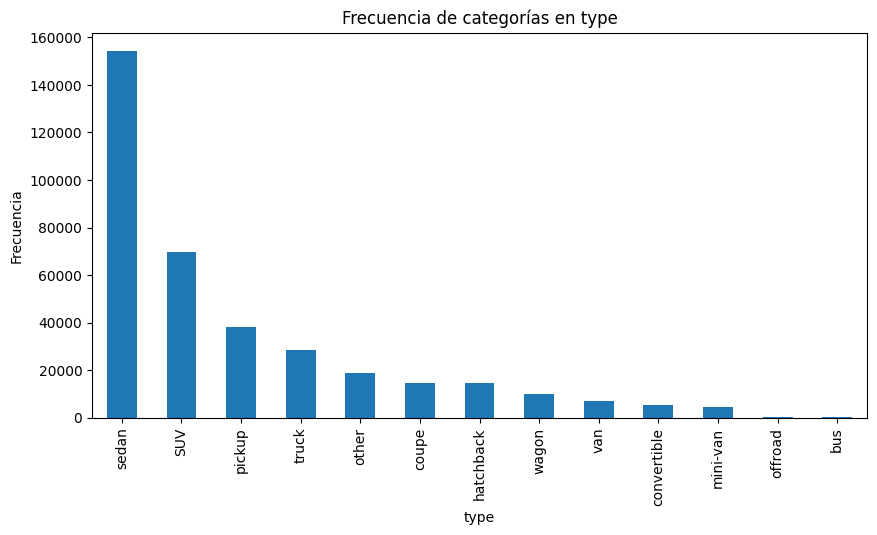

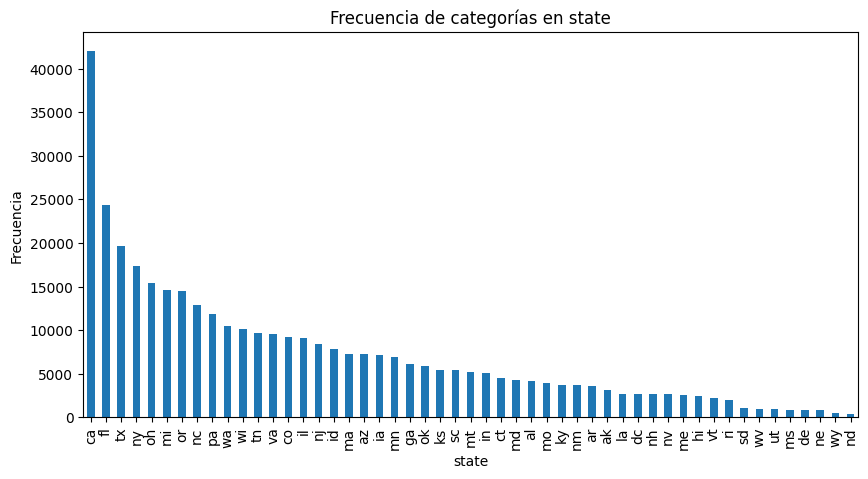

In [32]:
# Gráficas de barras de las variables con baja cardinalidad
for column in few_cardinal_variables:
    plt.figure(figsize=(10,5))
    cars_df[column].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de categorías en {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [33]:
# Aplicar método One-Hot
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_df = pd.DataFrame(encoder.fit_transform(cars_df[few_cardinal_variables]))
onehot_df

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366325,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [34]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.2 MB/s eta 0:00:00


In [35]:
# Aplicar codificación binaria
from category_encoders import BinaryEncoder
encoder = BinaryEncoder()
binary_df = pd.DataFrame(encoder.fit_transform(cars_df[highly_cardinal_variables]))
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,0
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [36]:
# Concatenar los resultados
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)
final_df

,price,age,odometer,0,1,2,3,4,5,6,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794060,0.574773,0.437060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669384,0.714813,0.487739,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852192,0.223713,0.242839,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767013,0.432133,0.364403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.560956,0.613949,0.665534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.681997,0.304266,0.320145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,0
366324,0.762738,0.223713,0.189543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
366325,0.808127,0.223713,0.107714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
366326,0.745306,0.372666,0.308810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,1
